In [1]:
import keras, numpy as np, matplotlib.pyplot as plt
from keras.datasets import mnist
from PIL import Image

(x_train,y_train),(x_test,y_test) = mnist.load_data()

x_train = np.reshape(x_train,[60000,784])
y_train = np.reshape(y_train,[60000,1])

x_test = np.reshape(x_test,[10000,784])
y_test = np.reshape(y_test,[10000,1])

mean = np.mean(x_train,axis=1,keepdims=True)
var = np.var(x_train,axis=1,keepdims=True)
x_train = (x_train-mean)/var

mean = np.squeeze(np.mean(mean,axis=0))
var = np.squeeze(np.mean(var,axis=0))
x_test = (x_test-mean)/var

z = np.zeros((60000,10))
for i in range(60000):
    z[i][y_train[i]] = 1
y_train = z

z = np.zeros((10000,10))
for i in range(10000):
    z[i][y_test[i]] = 1
y_test = z

del z,mean,var

Using TensorFlow backend.


In [2]:
def softmax(x):
    e_x = np.exp(x) 
    soft = e_x / (np.sum(e_x,axis=1).reshape(len(x),1))
    return soft

In [3]:
def tanh(x):
    t = (np.exp(x)-np.exp(-x)) / (np.exp(x)+np.exp(-x))
    return t

In [4]:
def dtanh(x):
    t=tanh(x)
    dt=1-t**2
    return dt

In [5]:
def relu(x):
    return x * (x > 0)

In [6]:
def drelu(x):
    return 1. * (x > 0)

In [7]:
def forward(x,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5):
    z1 = np.dot(x,w1) + b1
    a1 = np.array(relu(z1))
    
    z2 = np.dot(a1,w2) + b2
    a2 = np.array(relu(z2))
    
    z3 = np.dot(a2,w3) + b3
    a3 = np.array(relu(z3))

    z4 = np.dot(a3,w4) + b4
    a4 = np.array(relu(z4))
    
    z5 = np.dot(a4,w5) + b5
    a5 = np.array(softmax(z5))
    
    return a5

In [8]:
def update(x,y,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5,lr,lambd):
    
    z1 = np.dot(x,w1) + b1
    a1 = np.array(relu(z1))
    
    z2 = np.dot(a1,w2) + b2
    a2 = np.array(relu(z2))
    
    z3 = np.dot(a2,w3) + b3
    a3 = np.array(relu(z3))

    z4 = np.dot(a3,w4) + b4
    a4 = np.array(relu(z4))
    
    z5 = np.dot(a4,w5) + b5
    a5 = np.array(softmax(z5))
    
    m = len(x)
    
    dz5 = a5 - y
    dw5 = (1/m) * (np.dot(a4.T,dz5) + lambd*w5)
    db5 = (1/m) * np.sum(dz5,axis=0,keepdims=True)
    
    dz4 = np.dot(dz5,w5.T) * drelu(z4)
    dw4 = (1/m) * (np.dot(a3.T,dz4) + lambd*w4)
    db4 = (1/m) * np.sum(dz4,axis=0,keepdims=True)
    
    dz3 = np.dot(dz4,w4.T) * drelu(z3)
    dw3 = (1/m) * (np.dot(a2.T,dz3) + lambd*w3)
    db3 = (1/m) * np.sum(dz3,axis=0,keepdims=True)
    
    dz2 = np.dot(dz3,w3.T) * drelu(z2)
    dw2 = (1/m) * (np.dot(a1.T,dz2) + lambd*w2)
    db2 = (1/m) * np.sum(dz2,axis=0,keepdims=True)
    
    dz1 = np.dot(dz2,w2.T) * drelu(z1)
    dw1 = (1/m) * (np.dot(x.T,dz1) + lambd*w1)
    db1 = (1/m) * np.sum(dz1,axis=0,keepdims=True)
    
    w5 = w5 - lr*dw5
    b5 = b5 - lr*db5
    w4 = w4 - lr*dw4
    b4 = b4 - lr*db4
    w3 = w3 - lr*dw3
    b3 = b3 - lr*db3
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
    
    return [w1,b1,w2,b2,w3,b3,w4,b4,w5,b5]

In [9]:
np.random.seed(0)
w1 = np.random.randn(784,512) * np.sqrt(2/784)
np.random.seed(0)
w2 = np.random.randn(512,512) * np.sqrt(2/512)
np.random.seed(0)
w3 = np.random.randn(512,128) * np.sqrt(2/512)
np.random.seed(0)
w4 = np.random.randn(128,64) * np.sqrt(2/128)
np.random.seed(0)
w5 = np.random.randn(64,10) * np.sqrt(2/64)

b1 = np.zeros((1,512))
b2 = np.zeros((1,512))
b3 = np.zeros((1,128))
b4 = np.zeros((1,64))
b5 = np.zeros((1,10))

In [10]:
for k in range(10):
    for j in range(600):
        x_new = np.array([x_train[i] for i in range((100*j),(100*(j+1)))]).reshape(100,784)
        y_new = np.array([y_train[i] for i in range((100*j),(100*(j+1)))]).reshape(100,10)
        [w1,b1,w2,b2,w3,b3,w4,b4,w5,b5] = update(x_new,y_new,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5,0.1,0.001)

In [11]:
pred = forward(x_train,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5)
pred = np.argmax(pred,axis=1).reshape(len(pred),1)
label = np.argmax(y_train,axis=1).reshape(len(y_train),1)

m = np.equal(pred,label)
r = np.squeeze(np.sum(m,axis=0))
accu = (r/60000) * 100

print("Training Accuracy:",accu,"\b%")

Training Accuracy: 95.86 %


In [12]:
preds = forward(x_test,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5)
preds = np.argmax(preds,axis=1).reshape(len(preds),1)
truth = np.argmax(y_test,axis=1).reshape(len(y_test),1)

c = np.equal(preds,truth)
num = np.squeeze(np.sum(c,axis=0))
acc = (num/10000) * 100
print("Test Accuracy:",acc,"\b%")

Test Accuracy: 94.8 %


In [13]:
def gray(x):
    return (255 - np.mean(x,axis=2))

The model predicts 8


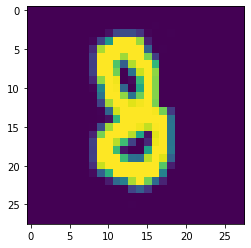

In [14]:
n = 'eight'
my_image = 'handwritten digits/' + n + '.jpg'
my_image = np.array(plt.imread(my_image))
my_image = Image.fromarray(my_image).resize((28,28))
image = np.array(gray(my_image)).reshape(1,784)
image = (image-np.mean(image))/np.var(image)
plt.imshow(gray(my_image))

prediction = forward(image,w1,b1,w2,b2,w3,b3,w4,b4,w5,b5)
prediction = np.squeeze(np.argmax(prediction))
print("The model predicts",prediction)